In [3]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from string import punctuation
import nltk
import re
import matplotlib.pyplot as plt
from scipy import sparse

In [5]:
# User inputs file name( with path)
fileinput = input("Enter name of updated file(include path):")
if not ".csv" in fileinput:
    fileinput += ".csv"
import pandas as pd 
team_df = pd.read_csv(fileinput, encoding='utf-8' )


Enter name of updated file(include path):/Users/neha.tandon1996/Downloads/DV_Sheet1.csv


In [6]:
team_df.head()

Unnamed: 0                                            STARTUP  \
0         1.0  INSOLAR, SIDE HUSTLE, mooVRoom, egoIDPsyche, D...   
1         2.0  Aura App, Wingman, Budpay, Resume Survivor, DA...   
2         3.0  Rise Capital, Wingman, SharperBarber, SIDE HUS...   
3         4.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
4         5.0  XPR, Split, INSOLAR, Second Chances, ELEVATE, ...   

                                               TEAMS  \
0  DATA SCIENCE TEAM - Data Science | Business An...   
1  DATA SCIENCE TEAM - Data Science | Business An...   
2          TEAM 2 - Creative - Content Writer/Editor   
3              DEVELOPMENT TEAM - App | Web | Mobile   
4              DEVELOPMENT TEAM - App | Web | Mobile   

                                             TEAMS.1  \
0           BUSINESS TEAM - Marketing | Finance | BD   
1           BUSINESS TEAM - Marketing | Finance | BD   
2  TEAM 3 - Marketing - Sales & Business Development   
3                   CREATIVE TEAM - Design | Content   
4  DATA SCIENCE TEAM - Data Science | Business An...   

                                    TEAMS.2                  TEAMS.3 TEAMS.4  \
0                   PM - Project Management                      NaN     NaN   
1                   PM - Project Management                      NaN     NaN   
2  TEAM 4 - Data - Insight & Interpretation                      NaN     NaN   
3                                       NaN                      NaN     NaN   
4  BUSINESS TEAM - Marketing | Finance | BD  PM - Project Management     NaN   

  TEAMS.5 TEAMS.6 Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13  \
0     NaN     NaN        NaN         NaN         NaN         NaN         NaN   
1     NaN     NaN        NaN         NaN         NaN         NaN         NaN   
2     NaN     NaN        NaN         NaN         NaN         NaN         NaN   
3     NaN     NaN        NaN         NaN         NaN         NaN         NaN   
4     NaN     NaN        NaN         NaN         NaN         NaN         NaN   

  Unnamed: 14 Unnamed: 15 Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19  
0         NaN         NaN         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN         NaN         NaN

In [7]:
team_df2 = team_df.iloc[:, 0:7] 
team_df2

Unnamed: 0                                            STARTUP  \
0            1.0  INSOLAR, SIDE HUSTLE, mooVRoom, egoIDPsyche, D...   
1            2.0  Aura App, Wingman, Budpay, Resume Survivor, DA...   
2            3.0  Rise Capital, Wingman, SharperBarber, SIDE HUS...   
3            4.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
4            5.0  XPR, Split, INSOLAR, Second Chances, ELEVATE, ...   
5            6.0  Aura App, Rise Capital, FORKAIA ACADEMY, LIVE ...   
6            7.0      OFFDIAL, FOVIES, Spotterz, SoftWear, Momentum   
7            8.0  PARADISIO, KHOOBASH, GoGoGo, NAIM, FORKAIA ACA...   
8            9.0  Rise Capital, SharperBarber, Round Z, Wincy, M...   
9           10.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
10          11.0  LEFTY, LivWin, Rockstar Entrepreneur, ProFashi...   
11          12.0  SWEAT FACTORY H AF, Game Chip, POWERCUBE, Swee...   
12          13.0  B4Usend, MMMWC, ONE SPOT, Playbük, DATA SCIENC...   
13          14.0  XPR, CIRCUMPASS, INSOLAR, GoGoGo, Budpay, Sand...   
14          15.0      XPR, Game Chip, POWERCUBE, Greenlit, SoftWear   
15          16.0  INSOLAR, Sitterz, PARADISIO, LANKING, TOLL'D, ...   
16          17.0          LivWin, Centimint, Greenlit, VRISING, POV   
17          18.0  SWEAT FACTORY H AF, Rise Capital, Wingman, RIS...   
18          19.0  CIRCUMPASS, INSOLAR, wetlabs, IQ BlindSpot, FO...   
19          20.0  RETURNZ, wetlabs, SharperBarber, FIRESTARTER, ...   
20          21.0  INSOLAR, Rise Capital, Round Z, Now Equity, DA...   
21          22.0   Wingman, KHOOBASH, TRENDZ, Mochi Tochi, moredata   
22          23.0         MMMWC, LIFESHOP, HaiR app, Membrain, PLAID   
23          24.0      COPYCATZ, Wingman, ELEVATE, Centimint, Droney   
24          25.0  INSOLAR, wetlabs, mooVRoom, the algorithm proj...   
25          26.0  XPR, IQ BlindSpot, POWERCUBE, ProFashion, DATA...   
26          27.0  Hiergraphics, B4Usend, mooVRoom, GERMANA, ONE ...   
27          28.0            CIRCUMPASS, Aura App, Wingman, LIFESHOP   
28          29.0  wetlabs, GoGoGo, Game Chip, HaiR app, Rockstar...   
29          30.0  INSOLAR, SIDE HUSTLE, KHOOBASH, mooVRoom, ELEV...   
...          ...                                                ...   
2601      2602.0  XPR, Wingman, GoGoGo, TRENDZ, Paper to Databas...   
2602      2603.0  Game Chip, Mochi Tochi, POWERCUBE, Paper to Da...   
2603      2604.0  Rise Capital, SharperBarber, SEMANTISCALE, Sof...   
2604      2605.0  FORKAIA ACADEMY, Momentum, TechCards, ProFashi...   
2605      2606.0            Droney, I'd like to work on my own idea   
2606      2607.0         Droney, Paper to Database, DOCS, HEAD GURU   
2607      2608.0  KHOOBASH, NAIM, MMMWC, Pink Algae, SoftWear, V...   
2608      2609.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
2609      2610.0  GoGoGo, Budpay, Game Chip, the algorithm proje...   
2610      2611.0  PARADISIO, Sparkles, Mochi Tochi, Greenlit, Ea...   
2611      2612.0  Split, ProFashion, nextsport, webappapp, DATA ...   
2612      2613.0  PARADISIO, Rise Capital, SIDE HUSTLE, Wincy, V...   
2613      2614.0  Rise Capital, Wingman, Round Z, Wincy, FIRESTA...   
2614      2615.0  Split, Round Z, FORKAIA ACADEMY, Karma Fund, L...   
2615      2616.0  INSOLAR, Greenlit, SoftWear, Scoot, AIID, PEAC...   
2616      2617.0  RETURNZ, ChickStarter, SharperBarber, KHOOBASH...   
2617      2618.0          XPR, mooVRoom, PLAID, Carousel, MUSICGRAF   
2618      2619.0  Split, Aura App, THE OLIVIA PROJECT, FORKAIA A...   
2619      2620.0  Split, OFFDIAL, Mochi Tochi, Now Equity, DATA ...   
2620      2621.0  CIRCUMPASS, Split, SWEAT FACTORY H AF, LEFTY, ...   
2621      2622.0  Split, SIDE HUSTLE, mooVRoom, GoGoGo, TRENDZ, ...   
2622      2623.0  Hiergraphics, Rise Capital, Round Z, Veeting, ...   
2623      2624.0  Sitterz, HORREAL, VRISING, 46andMix, DATA SCIE...   
2624      2625.0       GERMANA, Game Chip, egoIDPsyche, AIID, PLAID   
2625      2626.0  Aura App, IN

In [8]:
team_df2.columns=['index','startup','team1','team2','team3','team4','team5']
team_df2

index                                            startup  \
0        1.0  INSOLAR, SIDE HUSTLE, mooVRoom, egoIDPsyche, D...   
1        2.0  Aura App, Wingman, Budpay, Resume Survivor, DA...   
2        3.0  Rise Capital, Wingman, SharperBarber, SIDE HUS...   
3        4.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
4        5.0  XPR, Split, INSOLAR, Second Chances, ELEVATE, ...   
5        6.0  Aura App, Rise Capital, FORKAIA ACADEMY, LIVE ...   
6        7.0      OFFDIAL, FOVIES, Spotterz, SoftWear, Momentum   
7        8.0  PARADISIO, KHOOBASH, GoGoGo, NAIM, FORKAIA ACA...   
8        9.0  Rise Capital, SharperBarber, Round Z, Wincy, M...   
9       10.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
10      11.0  LEFTY, LivWin, Rockstar Entrepreneur, ProFashi...   
11      12.0  SWEAT FACTORY H AF, Game Chip, POWERCUBE, Swee...   
12      13.0  B4Usend, MMMWC, ONE SPOT, Playbük, DATA SCIENC...   
13      14.0  XPR, CIRCUMPASS, INSOLAR, GoGoGo, Budpay, Sand...   
14      15.0      XPR, Game Chip, POWERCUBE, Greenlit, SoftWear   
15      16.0  INSOLAR, Sitterz, PARADISIO, LANKING, TOLL'D, ...   
16      17.0          LivWin, Centimint, Greenlit, VRISING, POV   
17      18.0  SWEAT FACTORY H AF, Rise Capital, Wingman, RIS...   
18      19.0  CIRCUMPASS, INSOLAR, wetlabs, IQ BlindSpot, FO...   
19      20.0  RETURNZ, wetlabs, SharperBarber, FIRESTARTER, ...   
20      21.0  INSOLAR, Rise Capital, Round Z, Now Equity, DA...   
21      22.0   Wingman, KHOOBASH, TRENDZ, Mochi Tochi, moredata   
22      23.0         MMMWC, LIFESHOP, HaiR app, Membrain, PLAID   
23      24.0      COPYCATZ, Wingman, ELEVATE, Centimint, Droney   
24      25.0  INSOLAR, wetlabs, mooVRoom, the algorithm proj...   
25      26.0  XPR, IQ BlindSpot, POWERCUBE, ProFashion, DATA...   
26      27.0  Hiergraphics, B4Usend, mooVRoom, GERMANA, ONE ...   
27      28.0            CIRCUMPASS, Aura App, Wingman, LIFESHOP   
28      29.0  wetlabs, GoGoGo, Game Chip, HaiR app, Rockstar...   
29      30.0  INSOLAR, SIDE HUSTLE, KHOOBASH, mooVRoom, ELEV...   
...      ...                                                ...   
2601  2602.0  XPR, Wingman, GoGoGo, TRENDZ, Paper to Databas...   
2602  2603.0  Game Chip, Mochi Tochi, POWERCUBE, Paper to Da...   
2603  2604.0  Rise Capital, SharperBarber, SEMANTISCALE, Sof...   
2604  2605.0  FORKAIA ACADEMY, Momentum, TechCards, ProFashi...   
2605  2606.0            Droney, I'd like to work on my own idea   
2606  2607.0         Droney, Paper to Database, DOCS, HEAD GURU   
2607  2608.0  KHOOBASH, NAIM, MMMWC, Pink Algae, SoftWear, V...   
2608  2609.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
2609  2610.0  GoGoGo, Budpay, Game Chip, the algorithm proje...   
2610  2611.0  PARADISIO, Sparkles, Mochi Tochi, Greenlit, Ea...   
2611  2612.0  Split, ProFashion, nextsport, webappapp, DATA ...   
2612  2613.0  PARADISIO, Rise Capital, SIDE HUSTLE, Wincy, V...   
2613  2614.0  Rise Capital, Wingman, Round Z, Wincy, FIRESTA...   
2614  2615.0  Split, Round Z, FORKAIA ACADEMY, Karma Fund, L...   
2615  2616.0  INSOLAR, Greenlit, SoftWear, Scoot, AIID, PEAC...   
2616  2617.0  RETURNZ, ChickStarter, SharperBarber, KHOOBASH...   
2617  2618.0          XPR, mooVRoom, PLAID, Carousel, MUSICGRAF   
2618  2619.0  Split, Aura App, THE OLIVIA PROJECT, FORKAIA A...   
2619  2620.0  Split, OFFDIAL, Mochi Tochi, Now Equity, DATA ...   
2620  2621.0  CIRCUMPASS, Split, SWEAT FACTORY H AF, LEFTY, ...   
2621  2622.0  Split, SIDE HUSTLE, mooVRoom, GoGoGo, TRENDZ, ...   
2622  2623.0  Hiergraphics, Rise Capital, Round Z, Veeting, ...   
2623  2624.0  Sitterz, HORREAL, VRISING, 46andMix, DATA SCIE...   
2624  2625.0       GERMANA, Game Chip, egoIDPsyche, AIID, PLAID   
2625  2626.0  Aura App, INSOLAR, Waterblades, LIVE MEDITATIO...   
2626  2627.0  Greenlit, LIVE MEDITATION, ProFashion, Resume ...   
2627  2628.0  Budpay, Pink Algae, Game Chip, ONE SPOT, FORKA...   
2628  2629.0  COPYCATZ, Sparkles, momandpop, TRUNKSHOW

In [9]:
team_df2.team1 = team_df2.team1.str.replace(r'(^.*DATA SCIENCE.*$)', 'Data Science Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*DATA SCIENCE.*$)', 'Data Science Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*DATA SCIENCE.*$)', 'Data Science Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*DATA SCIENCE.*$)', 'Data Science Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*DATA SCIENCE.*$)', 'Data Science Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*data.*$)', 'Data Science Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*data.*$)', 'Data Science Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*data.*$)', 'Data Science Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*data.*$)', 'Data Science Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*data.*$)', 'Data Science Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Data.*$)', 'Data Science Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Data.*$)', 'Data Science Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Data.*$)', 'Data Science Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Data.*$)', 'Data Science Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Data.*$)', 'Data Science Team')

In [10]:
team_df2.team1 = team_df2.team1.str.replace(r'(^.*Creative.*$)', 'Creative Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Creative.*$)', 'Creative Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Creative.*$)', 'Creative Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Creative.*$)', 'Creative Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Creative.*$)', 'Creative Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*CREATIVE.*$)', 'Creative Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*CREATIVE.*$)', 'Creative Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*CREATIVE.*$)', 'Creative Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*CREATIVE.*$)', 'Creative Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*CREATIVE.*$)', 'Creative Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*Communication.*$)', 'Creative Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Communication.*$)', 'Creative Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Communication.*$)', 'Creative Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Communication.*$)', 'Creative Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Communication.*$)', 'Creative Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*COMMUNICATION.*$)', 'Creative Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*COMMUNICATION.*$)', 'Creative Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*COMMUNICATION.*$)', 'Creative Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*COMMUNICATION.*$)', 'Creative Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*COMMUNICATION.*$)', 'Creative Team')

In [11]:
team_df2.team1 = team_df2.team1.str.replace(r'(^.*Project.*$)', 'PM')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Project.*$)', 'PM')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Project.*$)', 'PM')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Project.*$)', 'PM')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Project.*$)', 'PM')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*PROJECT.*$)', 'PM')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*PROJECT.*$)', 'PM')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*PROJECT.*$)', 'PM')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*PROJECT.*$)', 'PM')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*PROJECT.*$)', 'PM')

In [12]:
team_df2.team1 = team_df2.team1.str.replace(r'(^.*BUSINESS.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*BUSINESS.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*BUSINESS.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*BUSINESS.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*BUSINESS.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*Business.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Business.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Business.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Business.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Business.*$)', 'Business Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Marketing.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Marketing.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Marketing.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Marketing.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Marketing.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*MARKETING.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*MARKETING.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*MARKETING.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*MARKETING.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*MARKETING.*$)', 'Business Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Sales.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Sales.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Sales.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Sales.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Sales.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*SALES.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*SALES.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*SALES.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*SALES.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*SALES.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*Customer.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Customer.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Customer.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Customer.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Customer.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*CUSTOMER.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*CUSTOMER.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*CUSTOMER.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*CUSTOMER.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*CUSTOMER.*$)', 'Business Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Research.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Research.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Research.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Research.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Research.*$)', 'Business Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*RESEARCH.*$)', 'Business Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*RESEARCH.*$)', 'Business Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*RESEARCH.*$)', 'Business Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*RESEARCH.*$)', 'Business Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*RESEARCH.*$)', 'Business Team')



In [13]:
team_df2.team1 = team_df2.team1.str.replace(r'(^.*Develop.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Develop.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Develop.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Develop.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Develop.*$)', 'Developers Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*DEVELOP.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*DEVELOP.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*DEVELOP.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*DEVELOP.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*DEVELOP.*$)', 'Developers Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Design.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Design.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Design.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Design.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Design.*$)', 'Developers Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*DESIGN.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*DESIGN.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*DESIGN.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*DESIGN.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*DESIGN.*$)', 'Developers Team')


team_df2.team1 = team_df2.team1.str.replace(r'(^.*Visualization.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*Visualization.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*Visualization.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*Visualization.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*Visualization.*$)', 'Developers Team')

team_df2.team1 = team_df2.team1.str.replace(r'(^.*VISUALIZATION.*$)', 'Developers Team')
team_df2.team2 = team_df2.team2.str.replace(r'(^.*VISUALIZATION.*$)', 'Developers Team')
team_df2.team3 = team_df2.team3.str.replace(r'(^.*VISUALIZATION.*$)', 'Developers Team')
team_df2.team4 = team_df2.team4.str.replace(r'(^.*VISUALIZATION.*$)', 'Developers Team')
team_df2.team5 = team_df2.team5.str.replace(r'(^.*VISUALIZATION.*$)', 'Developers Team')

In [14]:
team_df2

index                                            startup  \
0        1.0  INSOLAR, SIDE HUSTLE, mooVRoom, egoIDPsyche, D...   
1        2.0  Aura App, Wingman, Budpay, Resume Survivor, DA...   
2        3.0  Rise Capital, Wingman, SharperBarber, SIDE HUS...   
3        4.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
4        5.0  XPR, Split, INSOLAR, Second Chances, ELEVATE, ...   
5        6.0  Aura App, Rise Capital, FORKAIA ACADEMY, LIVE ...   
6        7.0      OFFDIAL, FOVIES, Spotterz, SoftWear, Momentum   
7        8.0  PARADISIO, KHOOBASH, GoGoGo, NAIM, FORKAIA ACA...   
8        9.0  Rise Capital, SharperBarber, Round Z, Wincy, M...   
9       10.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
10      11.0  LEFTY, LivWin, Rockstar Entrepreneur, ProFashi...   
11      12.0  SWEAT FACTORY H AF, Game Chip, POWERCUBE, Swee...   
12      13.0  B4Usend, MMMWC, ONE SPOT, Playbük, DATA SCIENC...   
13      14.0  XPR, CIRCUMPASS, INSOLAR, GoGoGo, Budpay, Sand...   
14      15.0      XPR, Game Chip, POWERCUBE, Greenlit, SoftWear   
15      16.0  INSOLAR, Sitterz, PARADISIO, LANKING, TOLL'D, ...   
16      17.0          LivWin, Centimint, Greenlit, VRISING, POV   
17      18.0  SWEAT FACTORY H AF, Rise Capital, Wingman, RIS...   
18      19.0  CIRCUMPASS, INSOLAR, wetlabs, IQ BlindSpot, FO...   
19      20.0  RETURNZ, wetlabs, SharperBarber, FIRESTARTER, ...   
20      21.0  INSOLAR, Rise Capital, Round Z, Now Equity, DA...   
21      22.0   Wingman, KHOOBASH, TRENDZ, Mochi Tochi, moredata   
22      23.0         MMMWC, LIFESHOP, HaiR app, Membrain, PLAID   
23      24.0      COPYCATZ, Wingman, ELEVATE, Centimint, Droney   
24      25.0  INSOLAR, wetlabs, mooVRoom, the algorithm proj...   
25      26.0  XPR, IQ BlindSpot, POWERCUBE, ProFashion, DATA...   
26      27.0  Hiergraphics, B4Usend, mooVRoom, GERMANA, ONE ...   
27      28.0            CIRCUMPASS, Aura App, Wingman, LIFESHOP   
28      29.0  wetlabs, GoGoGo, Game Chip, HaiR app, Rockstar...   
29      30.0  INSOLAR, SIDE HUSTLE, KHOOBASH, mooVRoom, ELEV...   
...      ...                                                ...   
2601  2602.0  XPR, Wingman, GoGoGo, TRENDZ, Paper to Databas...   
2602  2603.0  Game Chip, Mochi Tochi, POWERCUBE, Paper to Da...   
2603  2604.0  Rise Capital, SharperBarber, SEMANTISCALE, Sof...   
2604  2605.0  FORKAIA ACADEMY, Momentum, TechCards, ProFashi...   
2605  2606.0            Droney, I'd like to work on my own idea   
2606  2607.0         Droney, Paper to Database, DOCS, HEAD GURU   
2607  2608.0  KHOOBASH, NAIM, MMMWC, Pink Algae, SoftWear, V...   
2608  2609.0  XPR, CIRCUMPASS, Split, COPYCATZ, SWEAT FACTOR...   
2609  2610.0  GoGoGo, Budpay, Game Chip, the algorithm proje...   
2610  2611.0  PARADISIO, Sparkles, Mochi Tochi, Greenlit, Ea...   
2611  2612.0  Split, ProFashion, nextsport, webappapp, DATA ...   
2612  2613.0  PARADISIO, Rise Capital, SIDE HUSTLE, Wincy, V...   
2613  2614.0  Rise Capital, Wingman, Round Z, Wincy, FIRESTA...   
2614  2615.0  Split, Round Z, FORKAIA ACADEMY, Karma Fund, L...   
2615  2616.0  INSOLAR, Greenlit, SoftWear, Scoot, AIID, PEAC...   
2616  2617.0  RETURNZ, ChickStarter, SharperBarber, KHOOBASH...   
2617  2618.0          XPR, mooVRoom, PLAID, Carousel, MUSICGRAF   
2618  2619.0  Split, Aura App, THE OLIVIA PROJECT, FORKAIA A...   
2619  2620.0  Split, OFFDIAL, Mochi Tochi, Now Equity, DATA ...   
2620  2621.0  CIRCUMPASS, Split, SWEAT FACTORY H AF, LEFTY, ...   
2621  2622.0  Split, SIDE HUSTLE, mooVRoom, GoGoGo, TRENDZ, ...   
2622  2623.0  Hiergraphics, Rise Capital, Round Z, Veeting, ...   
2623  2624.0  Sitterz, HORREAL, VRISING, 46andMix, DATA SCIE...   
2624  2625.0       GERMANA, Game Chip, egoIDPsyche, AIID, PLAID   
2625  2626.0  Aura App, INSOLAR, Waterblades, LIVE MEDITATIO...   
2626  2627.0  Greenlit, LIVE MEDITATION, ProFashion, Resume ...   
2627  2628.0  Budpay, Pink Algae, Game Chip, ONE SPOT, FORKA...   
2628  2629.0  COPYCATZ, Sparkles, momandpop, TRUNKSHOW

In [15]:
team_df4 = pd.DataFrame(columns =['index','startup','team1','team2','team3','team4','team5'])

from pandas import Series, DataFrame
team_df5 =team_df2
team_df5 = (team_df5.set_index(team_df5.columns.drop('startup',1).tolist())
           .startup.str.split(',', expand=True)
           .stack()
           .reset_index()
           .rename(columns={0:'startup'})
          .loc[:, team_df5.columns]
        )
team_df5


index                 startup              team1              team2  \
0         1.0                 INSOLAR  Data Science Team      Business Team   
1         1.0             SIDE HUSTLE  Data Science Team      Business Team   
2         1.0                mooVRoom  Data Science Team      Business Team   
3         1.0             egoIDPsyche  Data Science Team      Business Team   
4         1.0       DATA SCIENCE ARMY  Data Science Team      Business Team   
5         2.0                Aura App  Data Science Team      Business Team   
6         2.0                 Wingman  Data Science Team      Business Team   
7         2.0                  Budpay  Data Science Team      Business Team   
8         2.0         Resume Survivor  Data Science Team      Business Team   
9         2.0       DATA SCIENCE ARMY  Data Science Team      Business Team   
10        3.0            Rise Capital      Creative Team      Business Team   
11        3.0                 Wingman      Creative Team      Business Team   
12        3.0           SharperBarber      Creative Team      Business Team   
13        3.0             SIDE HUSTLE      Creative Team      Business Team   
14        3.0       Rise Capital Fund      Creative Team      Business Team   
15        3.0         FORKAIA ACADEMY      Creative Team      Business Team   
16        3.0              Immerising      Creative Team      Business Team   
17        3.0               Raconteur      Creative Team      Business Team   
18        4.0                     XPR    Developers Team      Creative Team   
19        4.0              CIRCUMPASS    Developers Team      Creative Team   
20        4.0                   Split    Developers Team      Creative Team   
21        4.0                COPYCATZ    Developers Team      Creative Team   
22        4.0      SWEAT FACTORY H AF    Developers Team      Creative Team   
23        4.0            Hiergraphics    Developers Team      Creative Team   
24        4.0                   LEFTY    Developers Team      Creative Team   
25        4.0                 RETURNZ    Developers Team      Creative Team   
26        4.0                Aura App    Developers Team      Creative Team   
27        4.0                 B4Usend    Developers Team      Creative Team   
28        4.0                 INSOLAR    Developers Team      Creative Team   
29        4.0               Botligion    Developers Team      Creative Team   
...       ...                     ...                ...                ...   
21022  2627.0              ProFashion    Developers Team  Data Science Team   
21023  2627.0         Resume Survivor    Developers Team  Data Science Team   
21024  2627.0                 Protein    Developers Team  Data Science Team   
21025  2627.0            Time Machine    Developers Team  Data Science Team   
21026  2627.0                OnSupply    Developers Team  Data Science Team   
21027  2627.0             Edgeucation    Developers Team  Data Science Team   
21028  2627.0       DATA SCIENCE ARMY    Developers Team  Data Science Team   
21029  2628.0                  Budpay  Data Science Team      Business Team   
21030  2628.0              Pink Algae  Data Science Team      Business Team   
21031  2628.0               Game Chip  Data Science Team      Business Team   
21032  2628.0                ONE SPOT  Data Science Team      Business Team   
21033  2628.0         FORKAIA ACADEMY  Data Science Team      Business Team   
21034  2628.0                moredata  Data Science Team      Business Team   
21035  2628.0                 FORWARD  Data Science Team      Business Team   
21036  2629.0                COPYCATZ      Creative Team                NaN   
21037  2629.0                Sparkles      Creative Team                NaN   
21038  2629.0               momandpop      Creative Team                NaN   
21039  2629.0               TRUNKSHOW      Creative Team                NaN   
21040  2629.0              funfunfood      Creative Team  

In [16]:
team_matrix = pd.DataFrame(columns =['index','startup','Data Science Team','Business Team','PM','Developers Team','Creative Team'])
df= team_df5['startup'].unique().tolist()
del df[-9:]

team_matrix['startup'] = df



team_matrix


index                          startup Data Science Team Business Team  \
0     NaN                          INSOLAR               NaN           NaN   
1     NaN                      SIDE HUSTLE               NaN           NaN   
2     NaN                         mooVRoom               NaN           NaN   
3     NaN                      egoIDPsyche               NaN           NaN   
4     NaN                DATA SCIENCE ARMY               NaN           NaN   
5     NaN                         Aura App               NaN           NaN   
6     NaN                          Wingman               NaN           NaN   
7     NaN                           Budpay               NaN           NaN   
8     NaN                  Resume Survivor               NaN           NaN   
9     NaN                     Rise Capital               NaN           NaN   
10    NaN                    SharperBarber               NaN           NaN   
11    NaN                Rise Capital Fund               NaN           NaN   
12    NaN                  FORKAIA ACADEMY               NaN           NaN   
13    NaN                       Immerising               NaN           NaN   
14    NaN                        Raconteur               NaN           NaN   
15    NaN                              XPR               NaN           NaN   
16    NaN                       CIRCUMPASS               NaN           NaN   
17    NaN                            Split               NaN           NaN   
18    NaN                         COPYCATZ               NaN           NaN   
19    NaN               SWEAT FACTORY H AF               NaN           NaN   
20    NaN                     Hiergraphics               NaN           NaN   
21    NaN                            LEFTY               NaN           NaN   
22    NaN                          RETURNZ               NaN           NaN   
23    NaN                         Aura App               NaN           NaN   
24    NaN                          B4Usend               NaN           NaN   
25    NaN                          INSOLAR               NaN           NaN   
26    NaN                        Botligion               NaN           NaN   
27    NaN                     ChickStarter               NaN           NaN   
28    NaN                   Second Chances               NaN           NaN   
29    NaN                          ELEVATE               NaN           NaN   
..    ...                              ...               ...           ...   
230   NaN                            LIGHT               NaN           NaN   
231   NaN                     GPS PERSONAS               NaN           NaN   
232   NaN                         OnSupply               NaN           NaN   
233   NaN                          RAVERSE               NaN           NaN   
234   NaN                       funfunfood               NaN           NaN   
235   NaN                      Edgeucation               NaN           NaN   
236   NaN  I'd like to work on my own idea               NaN           NaN   
237   NaN                         RON Kids               NaN           NaN   
238   NaN                          Playbük               NaN           NaN   
239   NaN                  NO NET VENTURES               NaN           NaN   
240   NaN                     Sandy Apples               NaN           NaN   
241   NaN                       semantexts               NaN           NaN   
242   NaN                    RISE HOLDINGS               NaN           NaN   
243   NaN                        A_Connect               NaN           NaN   
244   NaN                         LIFESHOP               NaN           NaN   
245   NaN                        Raconteur               NaN           NaN   
246   NaN                         Membrain               NaN           NaN   
247   NaN                Rise Capital Fund               NaN           NaN   
248   NaN                            Scoot               NaN           NaN   
249   NaN                 

In [17]:
DATA_TEAM =0
CREATIVE_TEAM =0
DEVELOPERS_TEAM =0
BUSINESS_TEAM =0
PM =0
id=[]
id2=0
for elem in team_matrix['startup']:
    print(elem)
    id = []
    DATA_TEAM =0
    CREATIVE_TEAM =0
    DEVELOPERS_TEAM =0
    BUSINESS_TEAM =0
    PM =0
    
                 
    id = team_df5['startup'].loc[lambda x: x==elem].index
            
    for k in id:
                
                if team_df5.loc[k, 'team1'] == 'Data Science Team': #Correct it
                    DATA_TEAM = DATA_TEAM +1
                if team_df5.loc[k, 'team1']== 'Creative Team':
                    CREATIVE_TEAM = CREATIVE_TEAM +1
                if team_df5.loc[k, 'team1']== 'Business Team':
                    BUSINESS_TEAM = BUSINESS_TEAM +1
                if team_df5.loc[k, 'team1']== 'Developers Team':
                    DEVELOPERS_TEAM = DEVELOPERS_TEAM +1
                if team_df5.loc[k, 'team1']== 'PM':
                    PM = PM +1
                    
                if team_df5.loc[k, 'team2'] == 'Data Science Team': #Correct it
                    DATA_TEAM = DATA_TEAM +1
                if team_df5.loc[k, 'team2']== 'Creative Team':
                    CREATIVE_TEAM = CREATIVE_TEAM +1
                if team_df5.loc[k, 'team2']== 'Business Team':
                    BUSINESS_TEAM = BUSINESS_TEAM +1
                if team_df5.loc[k, 'team2']== 'Developers Team':
                    DEVELOPERS_TEAM = DEVELOPERS_TEAM +1
                if team_df5.loc[k, 'team2']== 'PM':
                    PM = PM +1
                    
                if team_df5.loc[k, 'team3'] == 'Data Science Team': #Correct it
                    DATA_TEAM = DATA_TEAM +1
                if team_df5.loc[k, 'team3']== 'Creative Team':
                    CREATIVE_TEAM = CREATIVE_TEAM +1
                if team_df5.loc[k, 'team3']== 'Business Team':
                    BUSINESS_TEAM = BUSINESS_TEAM +1
                if team_df5.loc[k, 'team3']== 'Developers Team':
                    DEVELOPERS_TEAM = DEVELOPERS_TEAM +1
                if team_df5.loc[k, 'team3']== 'PM':
                    PM = PM +1
                    
                if team_df5.loc[k, 'team4'] == 'Data Science Team': #Correct it
                    DATA_TEAM = DATA_TEAM +1
                if team_df5.loc[k, 'team4']== 'Creative Team':
                    CREATIVE_TEAM = CREATIVE_TEAM +1
                if team_df5.loc[k, 'team4']== 'Business Team':
                    BUSINESS_TEAM = BUSINESS_TEAM +1
                if team_df5.loc[k, 'team4']== 'Developers Team':
                    DEVELOPERS_TEAM = DEVELOPERS_TEAM +1
                if team_df5.loc[k, 'team4']== 'PM':
                    PM = PM +1
                    
                if team_df5.loc[k, 'team5'] == 'Data Science Team': #Correct it
                    DATA_TEAM = DATA_TEAM +1
                if team_df5.loc[k, 'team5']== 'Creative Team':
                    CREATIVE_TEAM = CREATIVE_TEAM +1
                if team_df5.loc[k, 'team5']== 'Business Team':
                    BUSINESS_TEAM = BUSINESS_TEAM +1
                if team_df5.loc[k, 'team5']== 'Developers Team':
                    DEVELOPERS_TEAM = DEVELOPERS_TEAM +1
                if team_df5.loc[k, 'team5']== 'PM':
                    PM = PM +1
    print(DATA_TEAM,BUSINESS_TEAM,PM,CREATIVE_TEAM,DEVELOPERS_TEAM)
    id2 = team_matrix['startup'].loc[lambda x: x==elem].index
    team_matrix.loc[id2, 'Data Science Team'] = DATA_TEAM
    team_matrix.loc[id2, 'Business Team'] = BUSINESS_TEAM
    team_matrix.loc[id2, 'Creative Team'] = CREATIVE_TEAM
    team_matrix.loc[id2, 'Developers Team'] = DEVELOPERS_TEAM
    team_matrix.loc[id2, 'PM'] = PM 
 

INSOLAR
187 150 26 33 79
 SIDE HUSTLE
202 158 55 68 134
 mooVRoom
194 103 51 58 124
 egoIDPsyche
63 32 20 20 42
 DATA SCIENCE ARMY
534 237 137 54 221
Aura App
163 88 23 31 105
 Wingman
165 100 48 47 113
 Budpay
172 96 45 37 109
 Resume Survivor
106 54 37 25 63
Rise Capital
149 106 30 13 48
 SharperBarber
129 86 31 38 95
 Rise Capital Fund
62 42 0 13 12
 FORKAIA ACADEMY
362 208 119 90 201
 Immerising
78 52 8 34 67
 Raconteur
92 51 25 30 61
XPR
310 210 74 94 188
 CIRCUMPASS
146 81 32 36 92
 Split
186 97 45 52 135
 COPYCATZ
139 91 35 42 90
 SWEAT FACTORY H AF
137 79 26 47 84
 Hiergraphics
146 77 37 54 119
 LEFTY
115 82 28 41 94
 RETURNZ
97 51 29 29 71
 Aura App
222 99 51 61 168
 B4Usend
240 87 31 33 129
 INSOLAR
230 152 47 68 140
 Botligion
114 58 24 36 87
 ChickStarter
111 57 31 48 98
 Second Chances
111 88 32 46 76
 ELEVATE
205 139 43 68 123
 TRENDZ
243 165 40 61 125
 Rise Capital
381 271 93 55 177
 LIVE MEDITATION
160 118 52 62 99
 TechCards
116 63 36 27 79
 I'd like to work on my own 

In [16]:
team_matrix = team_matrix.drop('index', axis=1)
team_matrix

startup Data Science Team Business Team   PM  \
0                            INSOLAR               187           150   26   
1                        SIDE HUSTLE               202           158   55   
2                           mooVRoom               194           103   51   
3                        egoIDPsyche                63            32   20   
4                  DATA SCIENCE ARMY               534           237  137   
5                           Aura App               163            88   23   
6                            Wingman               165           100   48   
7                             Budpay               172            96   45   
8                    Resume Survivor               106            54   37   
9                       Rise Capital               149           106   30   
10                     SharperBarber               129            86   31   
11                 Rise Capital Fund                62            42    0   
12                   FORKAIA ACADEMY               362           208  119   
13                        Immerising                78            52    8   
14                         Raconteur                92            51   25   
15                               XPR               310           210   74   
16                        CIRCUMPASS               146            81   32   
17                             Split               186            97   45   
18                          COPYCATZ               139            91   35   
19                SWEAT FACTORY H AF               137            79   26   
20                      Hiergraphics               146            77   37   
21                             LEFTY               115            82   28   
22                           RETURNZ                97            51   29   
23                          Aura App               222            99   51   
24                           B4Usend               240            87   31   
25                           INSOLAR               230           152   47   
26                         Botligion               114            58   24   
27                      ChickStarter               111            57   31   
28                    Second Chances               111            88   32   
29                           ELEVATE               205           139   43   
..                               ...               ...           ...  ...   
230                            LIGHT                 3             1    1   
231                     GPS PERSONAS                 2             0    0   
232                         OnSupply                 3             0    0   
233                          RAVERSE                 2             0    0   
234                       funfunfood                 2             0    0   
235                      Edgeucation                 3             0    0   
236  I'd like to work on my own idea                15            10    3   
237                         RON Kids                 0             0    0   
238                          Playbük                 1             3    0   
239                  NO NET VENTURES                 0             5    0   
240                     Sandy Apples                 1             0    0   
241                       semantexts                 2             4    0   
242                    RISE HOLDINGS                 3             0    0   
243                        A_Connect                 2             0    2   
244                         LIFESHOP                 5             4    0   
245                        Raconteur                 1             1    0   
246                         Membrain                 2             2    0   
247                Rise Capital Fund                 4             0    0   
248                            Scoot                 3             1    1   
249                         HaiR app                 3             0    0   
250                  SHIT

In [18]:
team = team_matrix
import string
id3=0
def cmp(a, b):
     return [c for c in a if c.isalpha()] == [c for c in b if c.isalpha()]
k=0
for i in team_matrix['startup']:
    
    k=k+1
    
    for elem in team_matrix[k:]['startup']:
        
        if cmp(i,elem):
            print('Hi')
            print(elem,i)
            id3 = team_matrix['startup'].loc[lambda x: x==elem].index
            team_matrix.loc[id3, 'startup'] = i
                # replace elem with i

Hi
 INSOLAR INSOLAR
Hi
SIDE HUSTLE  SIDE HUSTLE
Hi
mooVRoom  mooVRoom
Hi
DATA SCIENCE ARMY  DATA SCIENCE ARMY
Hi
 Aura App Aura App
Hi
Wingman  Wingman
Hi
Budpay  Budpay
Hi
Resume Survivor  Resume Survivor
Hi
 Rise Capital Rise Capital
Hi
SharperBarber  SharperBarber
Hi
Rise Capital Fund  Rise Capital Fund
Hi
FORKAIA ACADEMY  FORKAIA ACADEMY
Hi
Raconteur  Raconteur
Hi
CIRCUMPASS  CIRCUMPASS
Hi
Split  Split
Hi
COPYCATZ  COPYCATZ
Hi
SWEAT FACTORY H AF  SWEAT FACTORY H AF
Hi
Hiergraphics  Hiergraphics
Hi
LEFTY  LEFTY
Hi
RETURNZ  RETURNZ
Hi
B4Usend  B4Usend
Hi
Botligion  Botligion
Hi
ChickStarter  ChickStarter
Hi
Second Chances  Second Chances
Hi
ELEVATE  ELEVATE
Hi
TRENDZ  TRENDZ
Hi
LIVE MEDITATION  LIVE MEDITATION
Hi
I'd like to work on my own idea  I'd like to work on my own idea
Hi
 OFFDIAL OFFDIAL
Hi
FOVIES  FOVIES
Hi
Spotterz  Spotterz
Hi
SoftWear  SoftWear
Hi
Momentum  Momentum
Hi
 PARADISIO PARADISIO
Hi
KHOOBASH  KHOOBASH
Hi
GoGoGo  GoGoGo
Hi
NAIM  NAIM
Hi
NO NET VENTURES  NO NET V

In [19]:
team_trial = team_matrix['startup'].tolist()
team_trial

['INSOLAR',
 ' SIDE HUSTLE',
 ' mooVRoom',
 ' egoIDPsyche',
 ' DATA SCIENCE ARMY',
 'Aura App',
 ' Wingman',
 ' Budpay',
 ' Resume Survivor',
 'Rise Capital',
 ' SharperBarber',
 ' Rise Capital Fund',
 ' FORKAIA ACADEMY',
 ' Immerising',
 ' Raconteur',
 'XPR',
 ' CIRCUMPASS',
 ' Split',
 ' COPYCATZ',
 ' SWEAT FACTORY H AF',
 ' Hiergraphics',
 ' LEFTY',
 ' RETURNZ',
 'Aura App',
 ' B4Usend',
 'INSOLAR',
 ' Botligion',
 ' ChickStarter',
 ' Second Chances',
 ' ELEVATE',
 ' TRENDZ',
 'Rise Capital',
 ' LIVE MEDITATION',
 ' TechCards',
 " I'd like to work on my own idea",
 'OFFDIAL',
 ' FOVIES',
 ' Spotterz',
 ' SoftWear',
 ' Momentum',
 'PARADISIO',
 ' KHOOBASH',
 ' GoGoGo',
 ' NAIM',
 ' NO NET VENTURES',
 ' Round Z',
 ' Wincy',
 ' Sitterz',
 ' Nemebeat',
 'PARADISIO',
 ' wetlabs',
 ' PIMPMYPIC',
 ' LEFTY',
 ' LivWin',
 ' Rockstar Entrepreneur',
 ' ProFashion',
 ' SWEAT FACTORY H AF',
 ' Game Chip',
 ' POWERCUBE',
 ' SweetSpots',
 ' B4Usend',
 ' MMMWC',
 ' ONE SPOT',
 ' Playbük',
 ' Sandy 

In [20]:
team_matrix

index                           startup Data Science Team Business Team  \
0     NaN                           INSOLAR               187           150   
1     NaN                       SIDE HUSTLE               202           158   
2     NaN                          mooVRoom               194           103   
3     NaN                       egoIDPsyche                63            32   
4     NaN                 DATA SCIENCE ARMY               534           237   
5     NaN                          Aura App               163            88   
6     NaN                           Wingman               165           100   
7     NaN                            Budpay               172            96   
8     NaN                   Resume Survivor               106            54   
9     NaN                      Rise Capital               149           106   
10    NaN                     SharperBarber               129            86   
11    NaN                 Rise Capital Fund                62            42   
12    NaN                   FORKAIA ACADEMY               362           208   
13    NaN                        Immerising                78            52   
14    NaN                         Raconteur                92            51   
15    NaN                               XPR               310           210   
16    NaN                        CIRCUMPASS               146            81   
17    NaN                             Split               186            97   
18    NaN                          COPYCATZ               139            91   
19    NaN                SWEAT FACTORY H AF               137            79   
20    NaN                      Hiergraphics               146            77   
21    NaN                             LEFTY               115            82   
22    NaN                           RETURNZ                97            51   
23    NaN                          Aura App               222            99   
24    NaN                           B4Usend               240            87   
25    NaN                           INSOLAR               230           152   
26    NaN                         Botligion               114            58   
27    NaN                      ChickStarter               111            57   
28    NaN                    Second Chances               111            88   
29    NaN                           ELEVATE               205           139   
..    ...                               ...               ...           ...   
230   NaN                             LIGHT                 3             1   
231   NaN                      GPS PERSONAS                 2             0   
232   NaN                          OnSupply                 3             0   
233   NaN                           RAVERSE                 2             0   
234   NaN                        funfunfood                 2             0   
235   NaN                       Edgeucation                 3             0   
236   NaN   I'd like to work on my own idea                15            10   
237   NaN                          RON Kids                 0             0   
238   NaN                           Playbük                 1             3   
239   NaN                   NO NET VENTURES                 0             5   
240   NaN                      Sandy Apples                 1             0   
241   NaN                        semantexts                 2             4   
242   NaN                     RISE HOLDINGS                 3             0   
243   NaN                         A_Connect                 2             0   
244   NaN                          LIFESHOP                 5             4   
245   NaN                         Raconteur                 1             1   
246   NaN                          Membrain                 2             2   
247   NaN                 Rise Capital Fund                 4             0   
248   NaN                             Scoot           

In [21]:
team_final2 = pd.DataFrame(columns =['startup','Data Science Team','Business Team','PM','Developers Team','Creative Team'])

team_try = team_matrix
id = []
count1=0
count2=0
count3=0
count4=0
count5=0
for elem in team_try['startup'].unique():
    count1=0
    count2=0
    count3=0
    count4=0
    count5=0
    print(elem)
    id = team_try['startup'].loc[lambda x: x==elem].index
    for k in id:
            count1 = count1 + team_try.loc[k, 'Data Science Team']               
            count2 = count2 + team_try.loc[k, 'Business Team']
            count3 = count3 + team_try.loc[k, 'PM']
            count4 = count4 + team_try.loc[k, 'Developers Team']
            count5 = count5 + team_try.loc[k, 'Creative Team']
    new_row = {'startup': elem, 'Data Science Team': count1, 'Business Team': count2, 'PM': count3, 'Developers Team': count4, 'Creative Team':count5}
    team_final2 = team_final2.append(new_row, ignore_index=True)
                
                     


INSOLAR
 SIDE HUSTLE
 mooVRoom
 egoIDPsyche
 DATA SCIENCE ARMY
Aura App
 Wingman
 Budpay
 Resume Survivor
Rise Capital
 SharperBarber
 Rise Capital Fund
 FORKAIA ACADEMY
 Immerising
 Raconteur
XPR
 CIRCUMPASS
 Split
 COPYCATZ
 SWEAT FACTORY H AF
 Hiergraphics
 LEFTY
 RETURNZ
 B4Usend
 Botligion
 ChickStarter
 Second Chances
 ELEVATE
 TRENDZ
 LIVE MEDITATION
 TechCards
 I'd like to work on my own idea
OFFDIAL
 FOVIES
 Spotterz
 SoftWear
 Momentum
PARADISIO
 KHOOBASH
 GoGoGo
 NAIM
 NO NET VENTURES
 Round Z
 Wincy
 Sitterz
 Nemebeat
 wetlabs
 PIMPMYPIC
 LivWin
 Rockstar Entrepreneur
 ProFashion
 Game Chip
 POWERCUBE
 SweetSpots
 MMMWC
 ONE SPOT
 Playbük
 Sandy Apples
 Greenlit
 LANKING
 TOLL'D
 Scoot
 Paper to Database
 EasyLazy
 Centimint
 VRISING
 POV
 RISE HOLDINGS
 IQ BlindSpot
 FIRESTARTER
 Pink Algae
 the algorithm project
 HaiR app
 U.GOD
 Now Equity
 Mochi Tochi
 moredata
 LIFESHOP
 Membrain
 PLAID
 Droney
 GERMANA
 semantexts
 FORWARD
 PRONTO
 SEMANTISCALE
 Gpstickys
 46andMix
 D

In [22]:
team_try

index                           startup Data Science Team Business Team  \
0     NaN                           INSOLAR               187           150   
1     NaN                       SIDE HUSTLE               202           158   
2     NaN                          mooVRoom               194           103   
3     NaN                       egoIDPsyche                63            32   
4     NaN                 DATA SCIENCE ARMY               534           237   
5     NaN                          Aura App               163            88   
6     NaN                           Wingman               165           100   
7     NaN                            Budpay               172            96   
8     NaN                   Resume Survivor               106            54   
9     NaN                      Rise Capital               149           106   
10    NaN                     SharperBarber               129            86   
11    NaN                 Rise Capital Fund                62            42   
12    NaN                   FORKAIA ACADEMY               362           208   
13    NaN                        Immerising                78            52   
14    NaN                         Raconteur                92            51   
15    NaN                               XPR               310           210   
16    NaN                        CIRCUMPASS               146            81   
17    NaN                             Split               186            97   
18    NaN                          COPYCATZ               139            91   
19    NaN                SWEAT FACTORY H AF               137            79   
20    NaN                      Hiergraphics               146            77   
21    NaN                             LEFTY               115            82   
22    NaN                           RETURNZ                97            51   
23    NaN                          Aura App               222            99   
24    NaN                           B4Usend               240            87   
25    NaN                           INSOLAR               230           152   
26    NaN                         Botligion               114            58   
27    NaN                      ChickStarter               111            57   
28    NaN                    Second Chances               111            88   
29    NaN                           ELEVATE               205           139   
..    ...                               ...               ...           ...   
230   NaN                             LIGHT                 3             1   
231   NaN                      GPS PERSONAS                 2             0   
232   NaN                          OnSupply                 3             0   
233   NaN                           RAVERSE                 2             0   
234   NaN                        funfunfood                 2             0   
235   NaN                       Edgeucation                 3             0   
236   NaN   I'd like to work on my own idea                15            10   
237   NaN                          RON Kids                 0             0   
238   NaN                           Playbük                 1             3   
239   NaN                   NO NET VENTURES                 0             5   
240   NaN                      Sandy Apples                 1             0   
241   NaN                        semantexts                 2             4   
242   NaN                     RISE HOLDINGS                 3             0   
243   NaN                         A_Connect                 2             0   
244   NaN                          LIFESHOP                 5             4   
245   NaN                         Raconteur                 1             1   
246   NaN                          Membrain                 2             2   
247   NaN                 Rise Capital Fund                 4             0   
248   NaN                             Scoot           

In [23]:
team_final2

startup Data Science Team Business Team   PM Developers Team  \
0                INSOLAR               417           302   73             219   
1            SIDE HUSTLE               222           172   63             149   
2               mooVRoom               210           118   59             145   
3            egoIDPsyche                63            32   20              42   
4      DATA SCIENCE ARMY               541           241  139             222   
5               Aura App               385           187   74             273   
6                Wingman               197           115   54             127   
7                 Budpay               185           100   48             112   
8        Resume Survivor               107            54   37              64   
9           Rise Capital               530           377  123             225   
10         SharperBarber               139            92   37             103   
11     Rise Capital Fund                66            42    0              14   
12       FORKAIA ACADEMY               378           215  119             204   
13            Immerising                78            52    8              67   
14             Raconteur                93            52   25              61   
15                   XPR               310           210   74             188   
16            CIRCUMPASS               292           217   75             178   
17                 Split               419           239   86             273   
18              COPYCATZ               191           140   46             124   
19    SWEAT FACTORY H AF               180           118   38             109   
20          Hiergraphics               331           147   77             254   
21                 LEFTY               181           124   48             140   
22               RETURNZ               136            67   32              75   
23               B4Usend               340           129   43             165   
24             Botligion               128            69   26              94   
25          ChickStarter               133            82   38             103   
26        Second Chances               135           106   42              86   
27               ELEVATE               223           148   48             136   
28                TRENDZ               258           171   41             126   
29       LIVE MEDITATION               160           118   53             100   
..                   ...               ...           ...  ...             ...   
139              Tofushi                 3             2    0               2   
140            Toytrader                 6             1    1               2   
141              Vanilla                 5             0    0               2   
142            webappapp                 8             1    2               6   
143                  #67                 2             0    0               2   
144               Adonis                 2             0    0               2   
145             Ahonetwo                 2             0    0               2   
146             Bachicas                 2             0    0               2   
147               BANDAI                 3             1    1               2   
148             Carousel                 4             0    0               2   
149          Citric acid                 2             0    0               2   
150                 DOCS                 6             0    2               4   
151               Emojee                 3             1    1               4   
152             Escargot                 5             3    0               2   
153            HEAD GURU                 6             0    2               4   
154               Moguly                 4             0    0               2   
155            MUSICGRAF                 4             0    0               2   
156            nextsport                 6      

In [24]:
team_final2 = team_final2[:-1]
team_final2.to_excel (r'/Users/neha.tandon1996/Downloads/matrix.xlsx', index = True, header=True)

Enter path to save file:/Users/neha.tandon1996/Downloads/bah.png


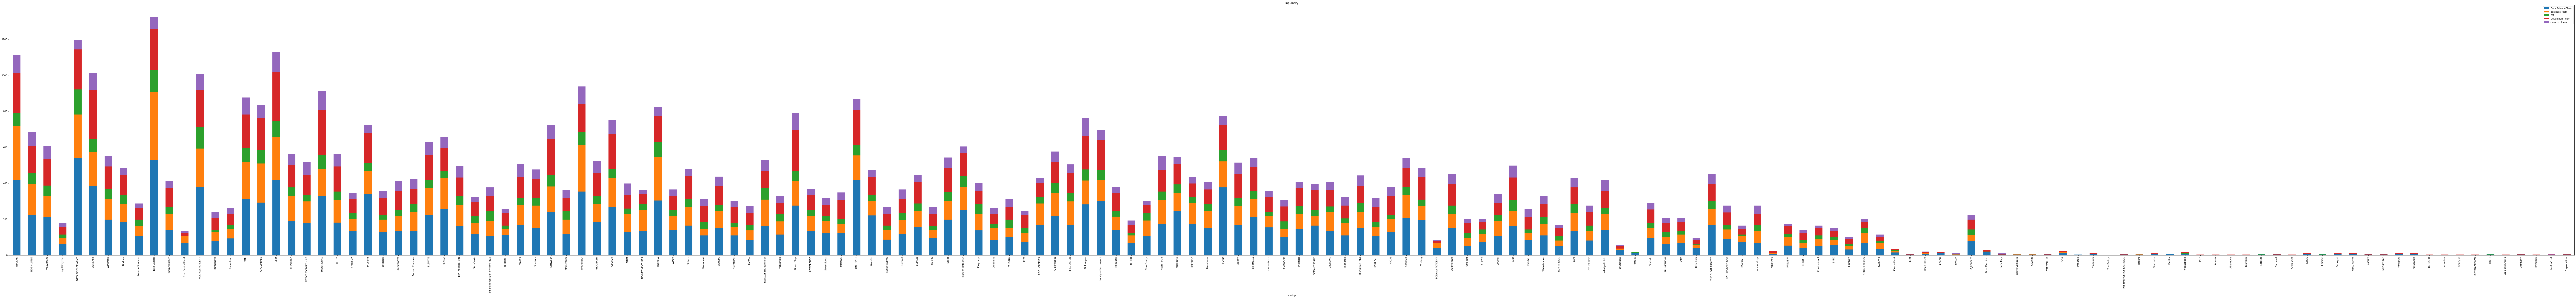

In [25]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (200, 20)
team_final2.plot('startup',kind='bar', stacked=True)

plt.title("Popularity")
fileinput2 = input("Enter path to save file:")
plt.savefig(fileinput2, encoding='utf-8')

In [26]:

#total_no = [ row.Data Science Team + row.Business Team + row.PM + row.Developers Team + row.Creative Team  for row in team_final2.iterrows() ] 
#team_final2['total'] = total_no

team_final2['total'] = team_final2.apply(lambda row: row['Data Science Team'] + row['Business Team'] + row['PM'] + row['Developers Team'] + row['Creative Team'], axis=1) 


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [27]:
team_final2
 

startup Data Science Team Business Team   PM  \
0                    INSOLAR               417           302   73   
1                SIDE HUSTLE               222           172   63   
2                   mooVRoom               210           118   59   
3                egoIDPsyche                63            32   20   
4          DATA SCIENCE ARMY               541           241  139   
5                   Aura App               385           187   74   
6                    Wingman               197           115   54   
7                     Budpay               185           100   48   
8            Resume Survivor               107            54   37   
9               Rise Capital               530           377  123   
10             SharperBarber               139            92   37   
11         Rise Capital Fund                66            42    0   
12           FORKAIA ACADEMY               378           215  119   
13                Immerising                78            52    8   
14                 Raconteur                93            52   25   
15                       XPR               310           210   74   
16                CIRCUMPASS               292           217   75   
17                     Split               419           239   86   
18                  COPYCATZ               191           140   46   
19        SWEAT FACTORY H AF               180           118   38   
20              Hiergraphics               331           147   77   
21                     LEFTY               181           124   48   
22                   RETURNZ               136            67   32   
23                   B4Usend               340           129   43   
24                 Botligion               128            69   26   
25              ChickStarter               133            82   38   
26            Second Chances               135           106   42   
27                   ELEVATE               223           148   48   
28                    TRENDZ               258           171   41   
29           LIVE MEDITATION               160           118   53   
..                       ...               ...           ...  ...   
138   THE EMERGENCY BACKPACK                 3             0    0   
139                  Tofushi                 3             2    0   
140                Toytrader                 6             1    1   
141                  Vanilla                 5             0    0   
142                webappapp                 8             1    2   
143                      #67                 2             0    0   
144                   Adonis                 2             0    0   
145                 Ahonetwo                 2             0    0   
146                 Bachicas                 2             0    0   
147                   BANDAI                 3             1    1   
148                 Carousel                 4             0    0   
149              Citric acid                 2             0    0   
150                     DOCS                 6             0    2   
151                   Emojee                 3             1    1   
152                 Escargot                 5             3    0   
153                HEAD GURU                 6             0    2   
154                   Moguly                 4             0    0   
155                MUSICGRAF                 4             0    0   
156                nextsport                 6             0    0   
157               Result App                 6             0    2   
158                  BOTDOJO                 2             0    0   
159                  ecamino                 2             0    0   
160                   TORQUE                 2             0    0   
161        Jellyfish Antfarm                 2             0    0   
162                    LIGHT                 3             1    1   
163             GPS PERSONAS                 2             0    0   
164                

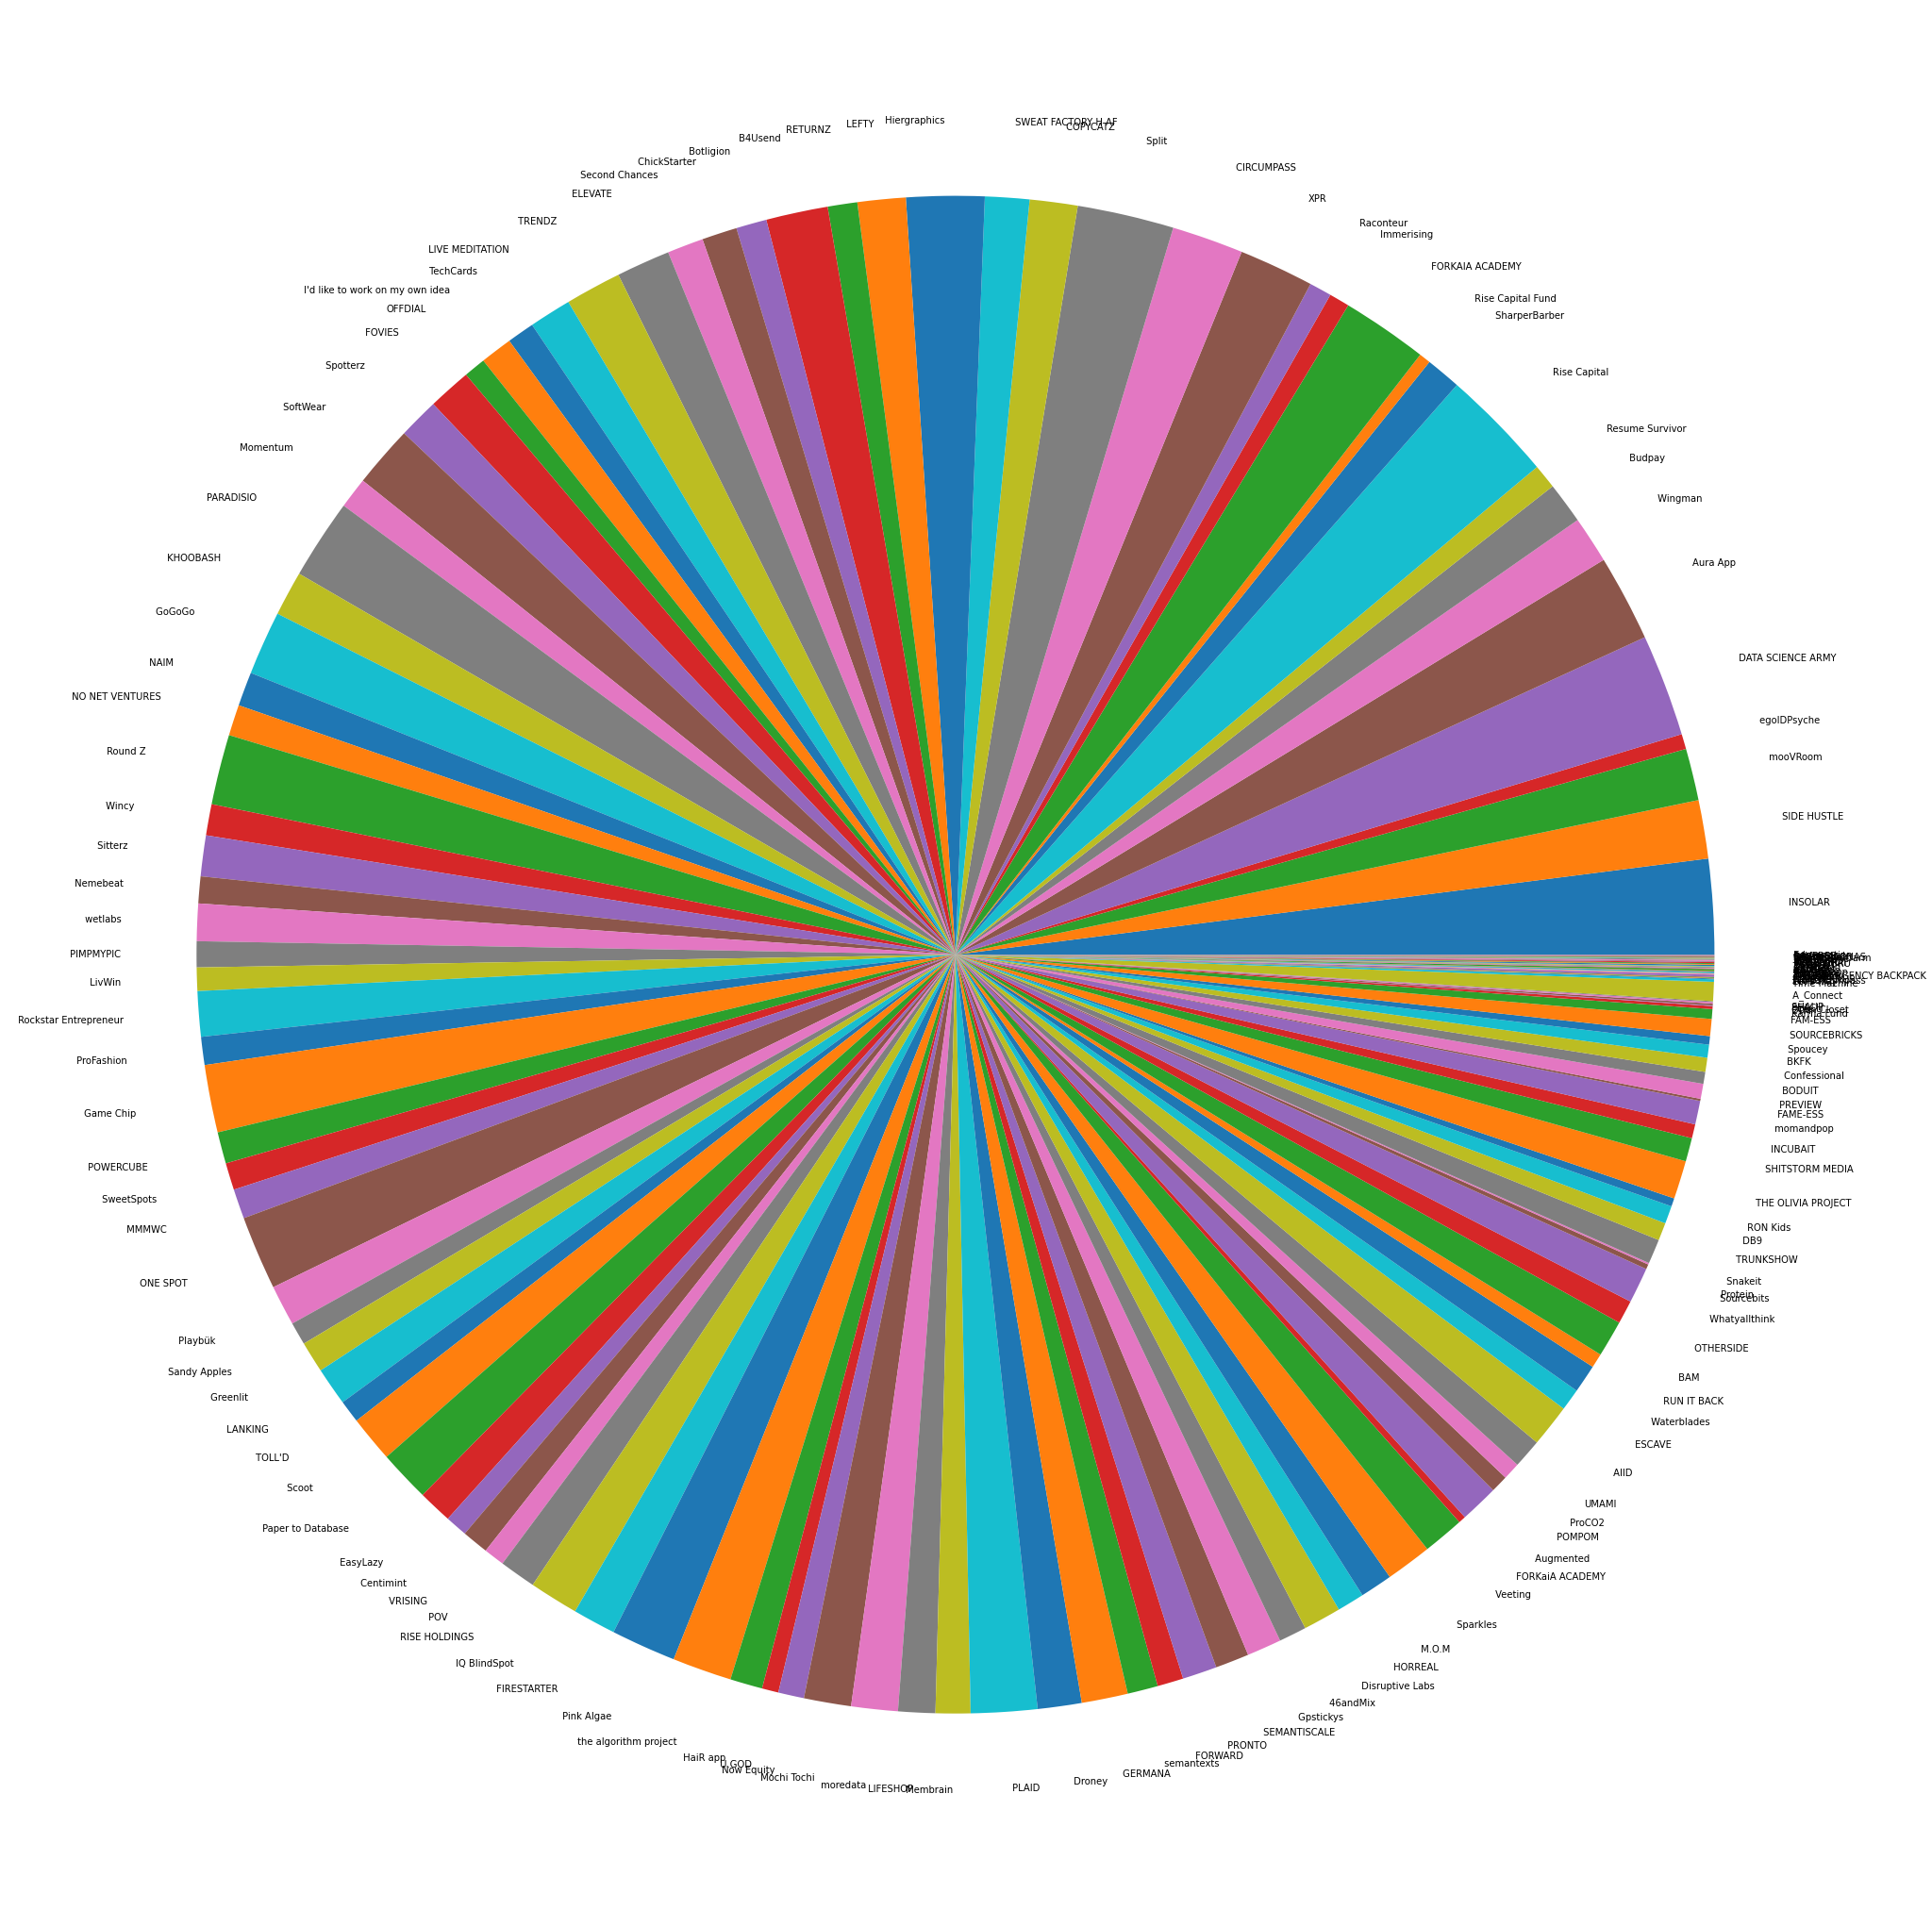

In [26]:
import numpy as np 
# Creating plot 
fig = plt.figure(figsize =(80, 37)) 
plt.pie(team_final2['total'], labels = team_final2['startup']) 
  
# show plot 
plt.show()

Enter path to save file:/Users/neha.tandon1996/Downloads/p2.png


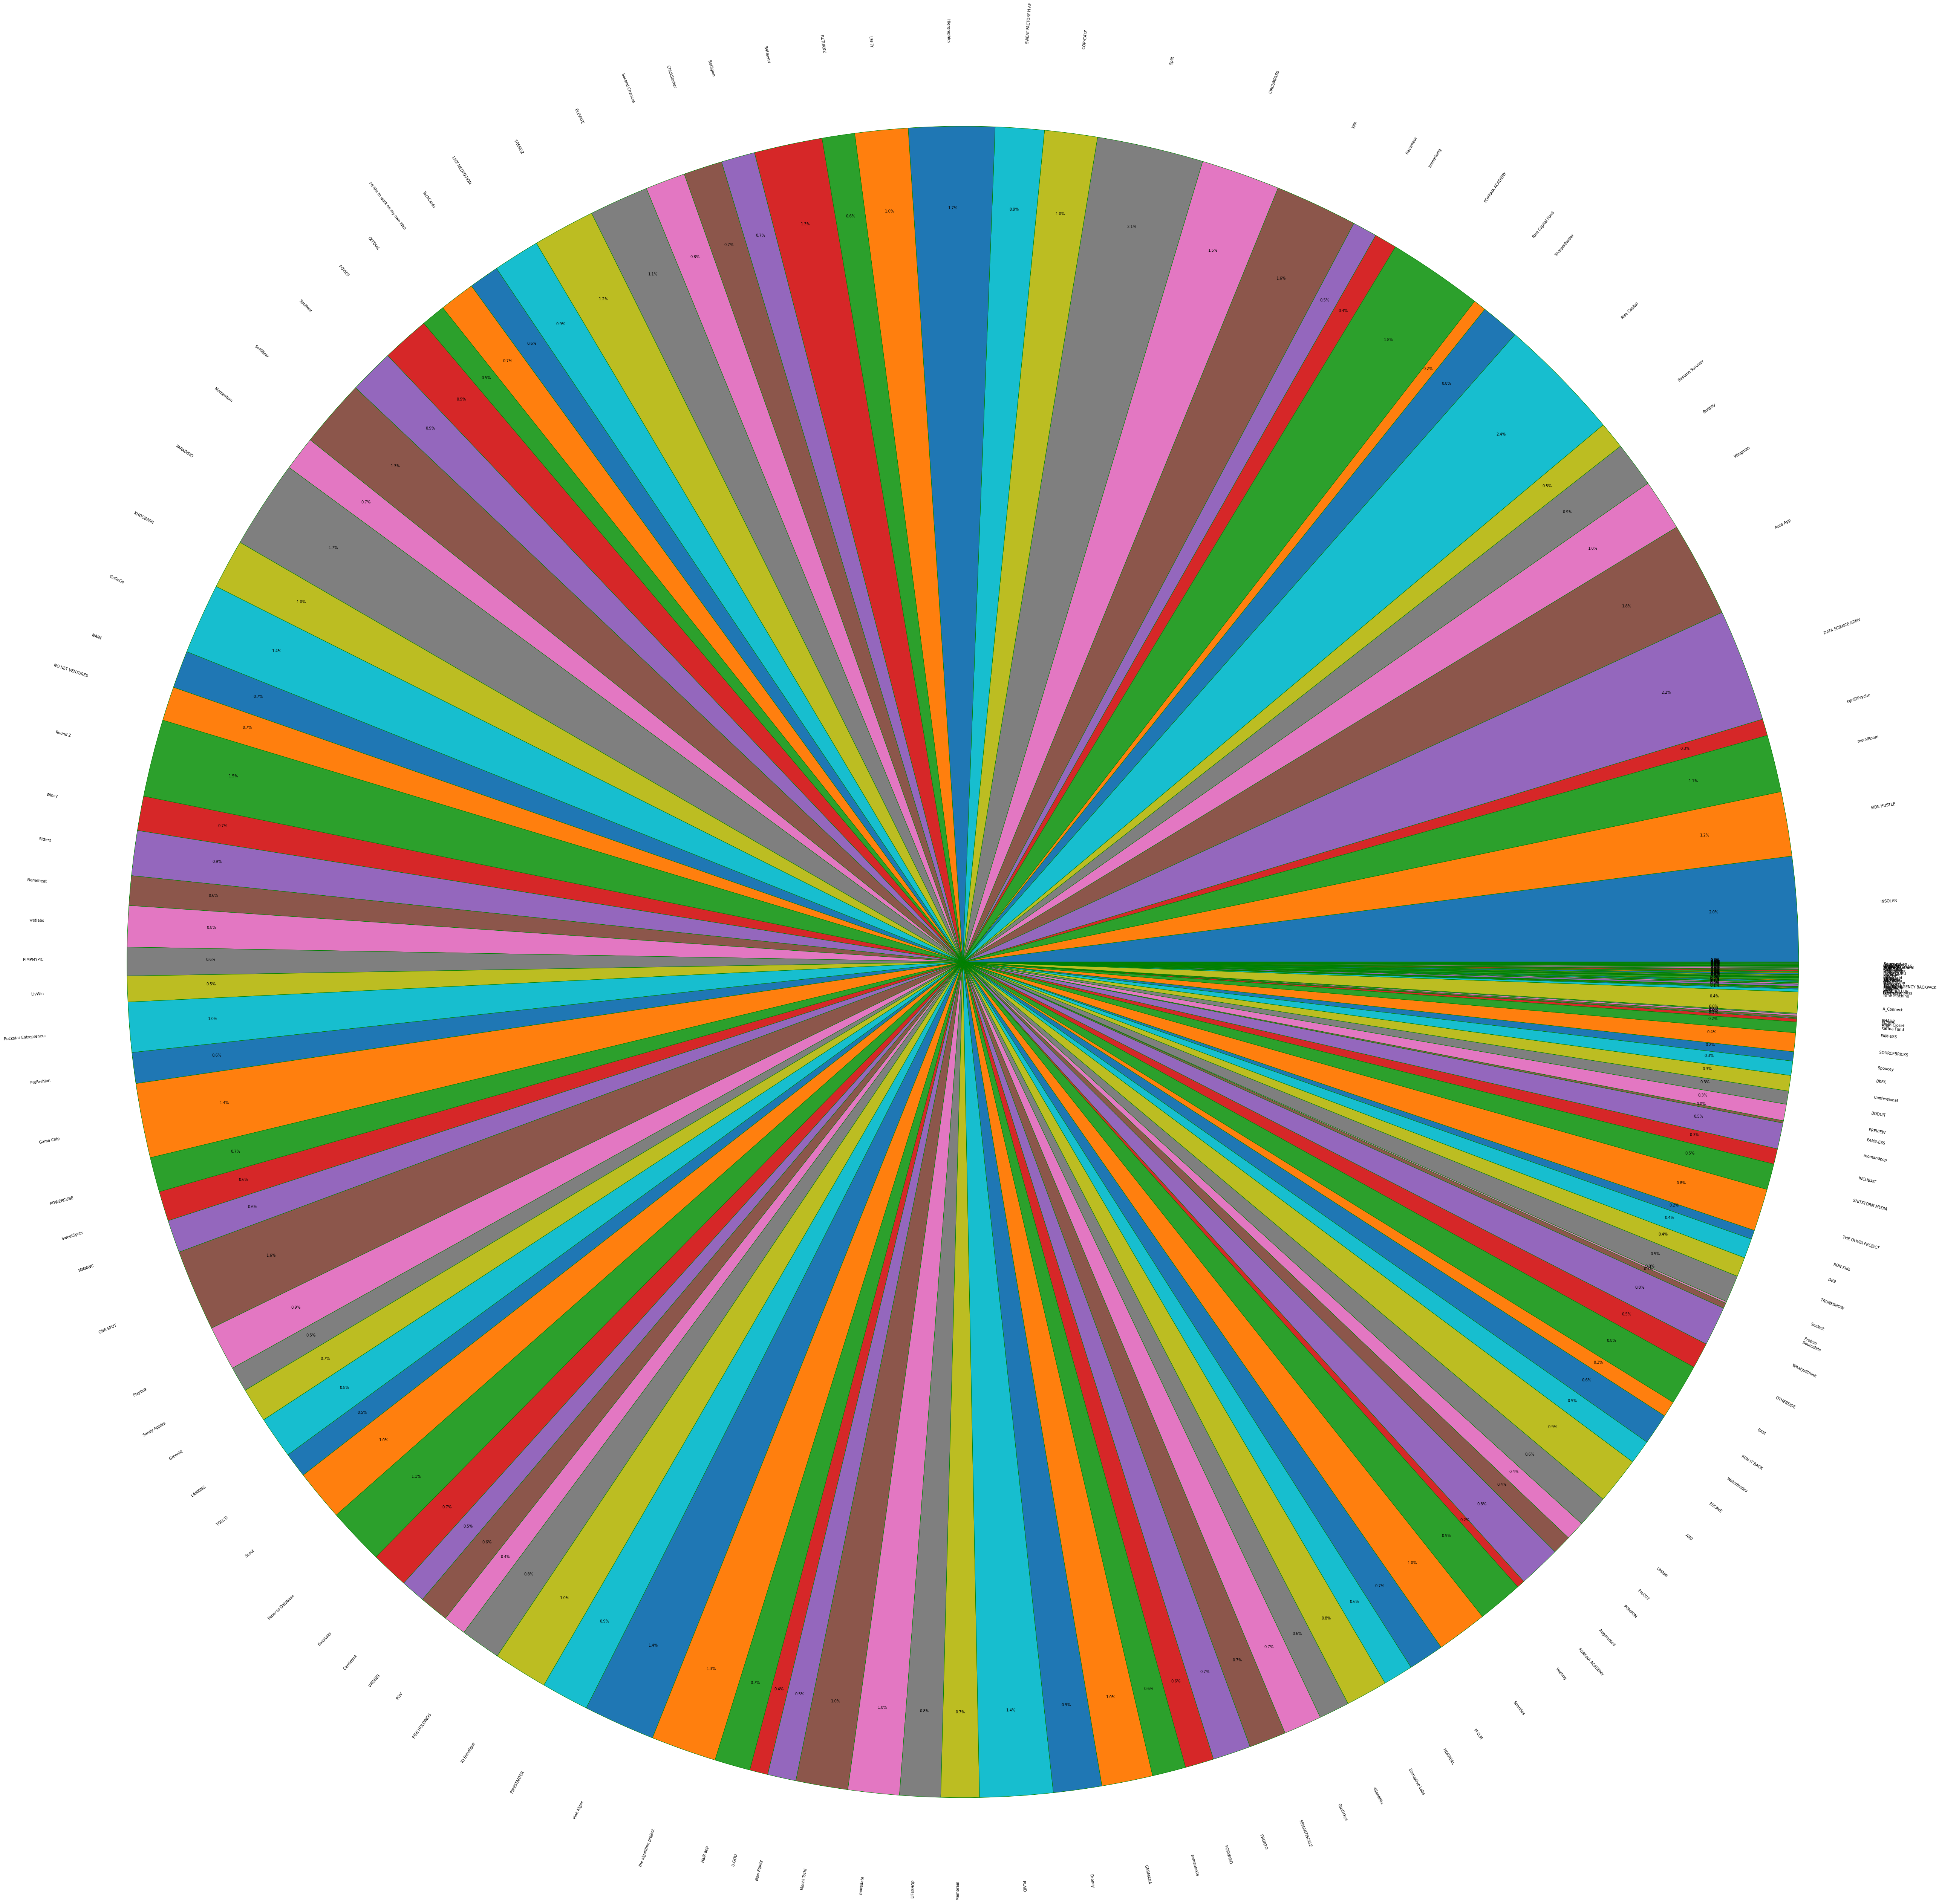

In [83]:
#increase size of pie chart
#nested pie chart
#display percentages
# Creating explode data 
import numpy as np 
exp = [0] * 168

wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})  
# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n".format(pct) 
  
# Creating plot 
fig, ax = plt.subplots(figsize =(60, 17)) 
wedges, texts, autotexts = ax.pie(team_final2['total'],  
                                  autopct = lambda pct: func(pct, team_final2['total']),  
                                  labels = team_final2['startup'], 
                                  shadow = False,   
                                  wedgeprops = wp,
                                  rotatelabels = True,
                                  pctdistance = 0.9,
                                  explode = exp,
                                  radius = 6,
                                  textprops = dict(color ="black")) 

fileinput3 = input("Enter path to save file:")
plt.savefig(fileinput3, encoding='utf-8', bbox_inches='tight')



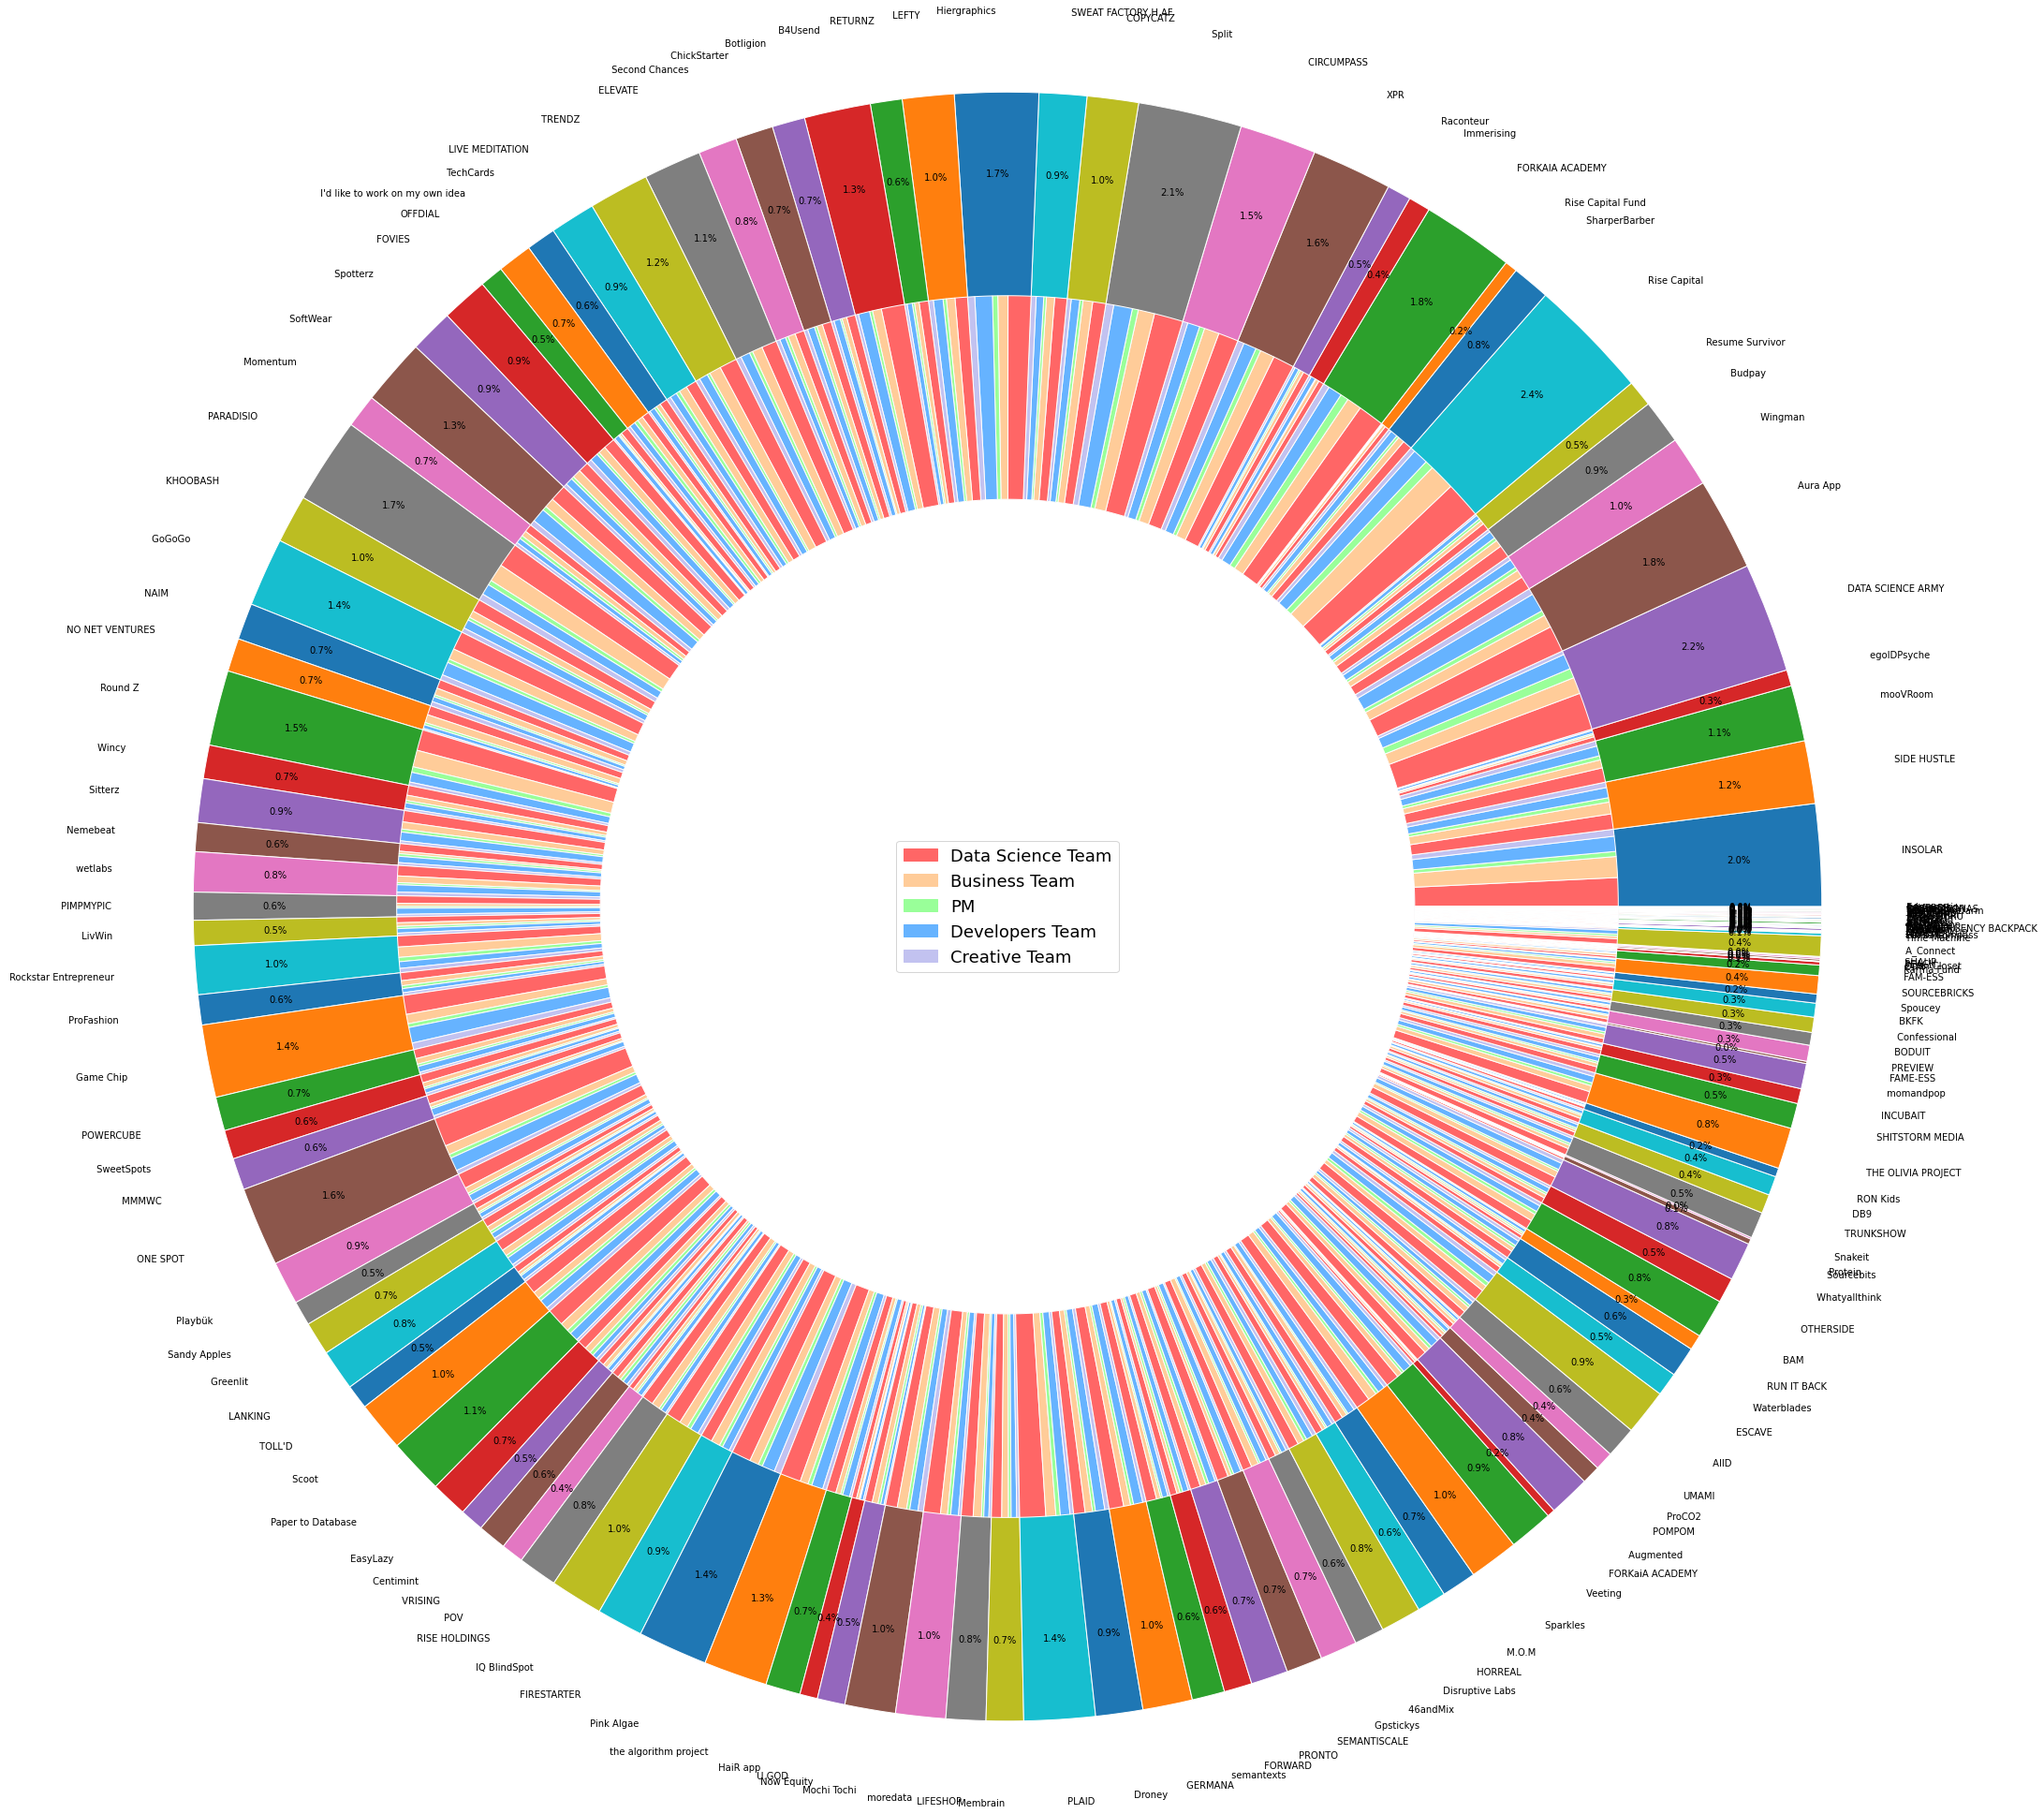

Enter path to save file:/Users/neha.tandon1996/Downloads/donut2.png


<Figure size 14400x1440 with 0 Axes>

In [163]:
import matplotlib.patches as mpatches
fig, ax = plt.subplots()
subgroup_names = ['DS', 'BT', 'PM','DT', 'CT'] * 168
subgroup_size = team_final2[['Data Science Team','Business Team','PM', 'Developers Team', 'Creative Team']]
subgroup_size = subgroup_size.to_numpy()
subgroup_size = subgroup_size.ravel()
subgroup_size

colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff', '#c2c2f0']
mypie, _ , junk = ax.pie(team_final2['total'], radius=2, labels=team_final2['startup'], autopct='%1.1f%%', pctdistance = 0.9)
plt.setp( mypie, width=1.0, edgecolor='white')
result = subgroup_size.flatten() 
red_patch = mpatches.Patch(color='#ff6666', label='Data Science Team')
b = mpatches.Patch(color='#ffcc99', label='Business Team')
c =  mpatches.Patch(color='#99ff99', label='PM')
d =  mpatches.Patch(color='#66b3ff', label='Developers Team')
e =  mpatches.Patch(color='#c2c2f0', label='Creative Team')
plt.legend(handles=[red_patch, b,c,d,e], loc=0, prop={'size': 18})
mypie2, _ = ax.pie(subgroup_size, radius=2-0.5, labeldistance=0.9,  colors = colors ) #, autopct='%1.1f%%', pctdistance = 0.95 
plt.setp( mypie2, width=0.5, edgecolor='white')
plt.margins(0,0)

plt.show()

fileinput4 = input("Enter path to save file:")
plt.savefig(fileinput4, encoding='utf-8', bbox_inches='tight')



In [148]:
#Issue: Overlap of labels